In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #if using matplotlib
import geopandas as gpd
import plotly.express as px
import pyproj
import imageio

In [53]:
fp = "../Data/StateShapeFiles/historicalstates/US_HistStateTerr_Gen001.shx"
map_df = gpd.read_file(fp)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

In [54]:
map_df = map_df[map_df['CITATION'].apply(lambda x: x == '(Declaration of Independence)')]

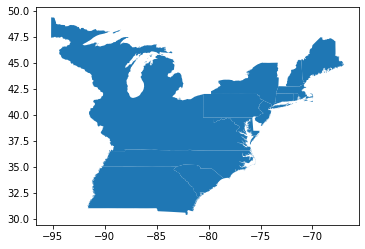

In [57]:
fig, ax = plt.subplots(1, 1)
map_df.plot(figsize=(800, 300), ax = ax)
plt.show()

In [5]:
fips_2019 = fips_hhi[fips_hhi['date'] == "jun2019"]

In [6]:
map_df['FIPS'] = map_df['STATEFP'] + map_df['COUNTYFP']

In [7]:
df_merged = map_df.merge(fips_2019, left_on=['FIPS'], right_on=['fips'])
df_merged.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,FIPS,fips,date,year,HHI
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",21007,21007,jun2019,2019,1751.655422
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",21017,21017,jun2019,2019,1113.499696
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",21031,21031,jun2019,2019,1442.393350
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",21065,21065,jun2019,2019,1359.226698
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",21069,21069,jun2019,2019,1374.128630


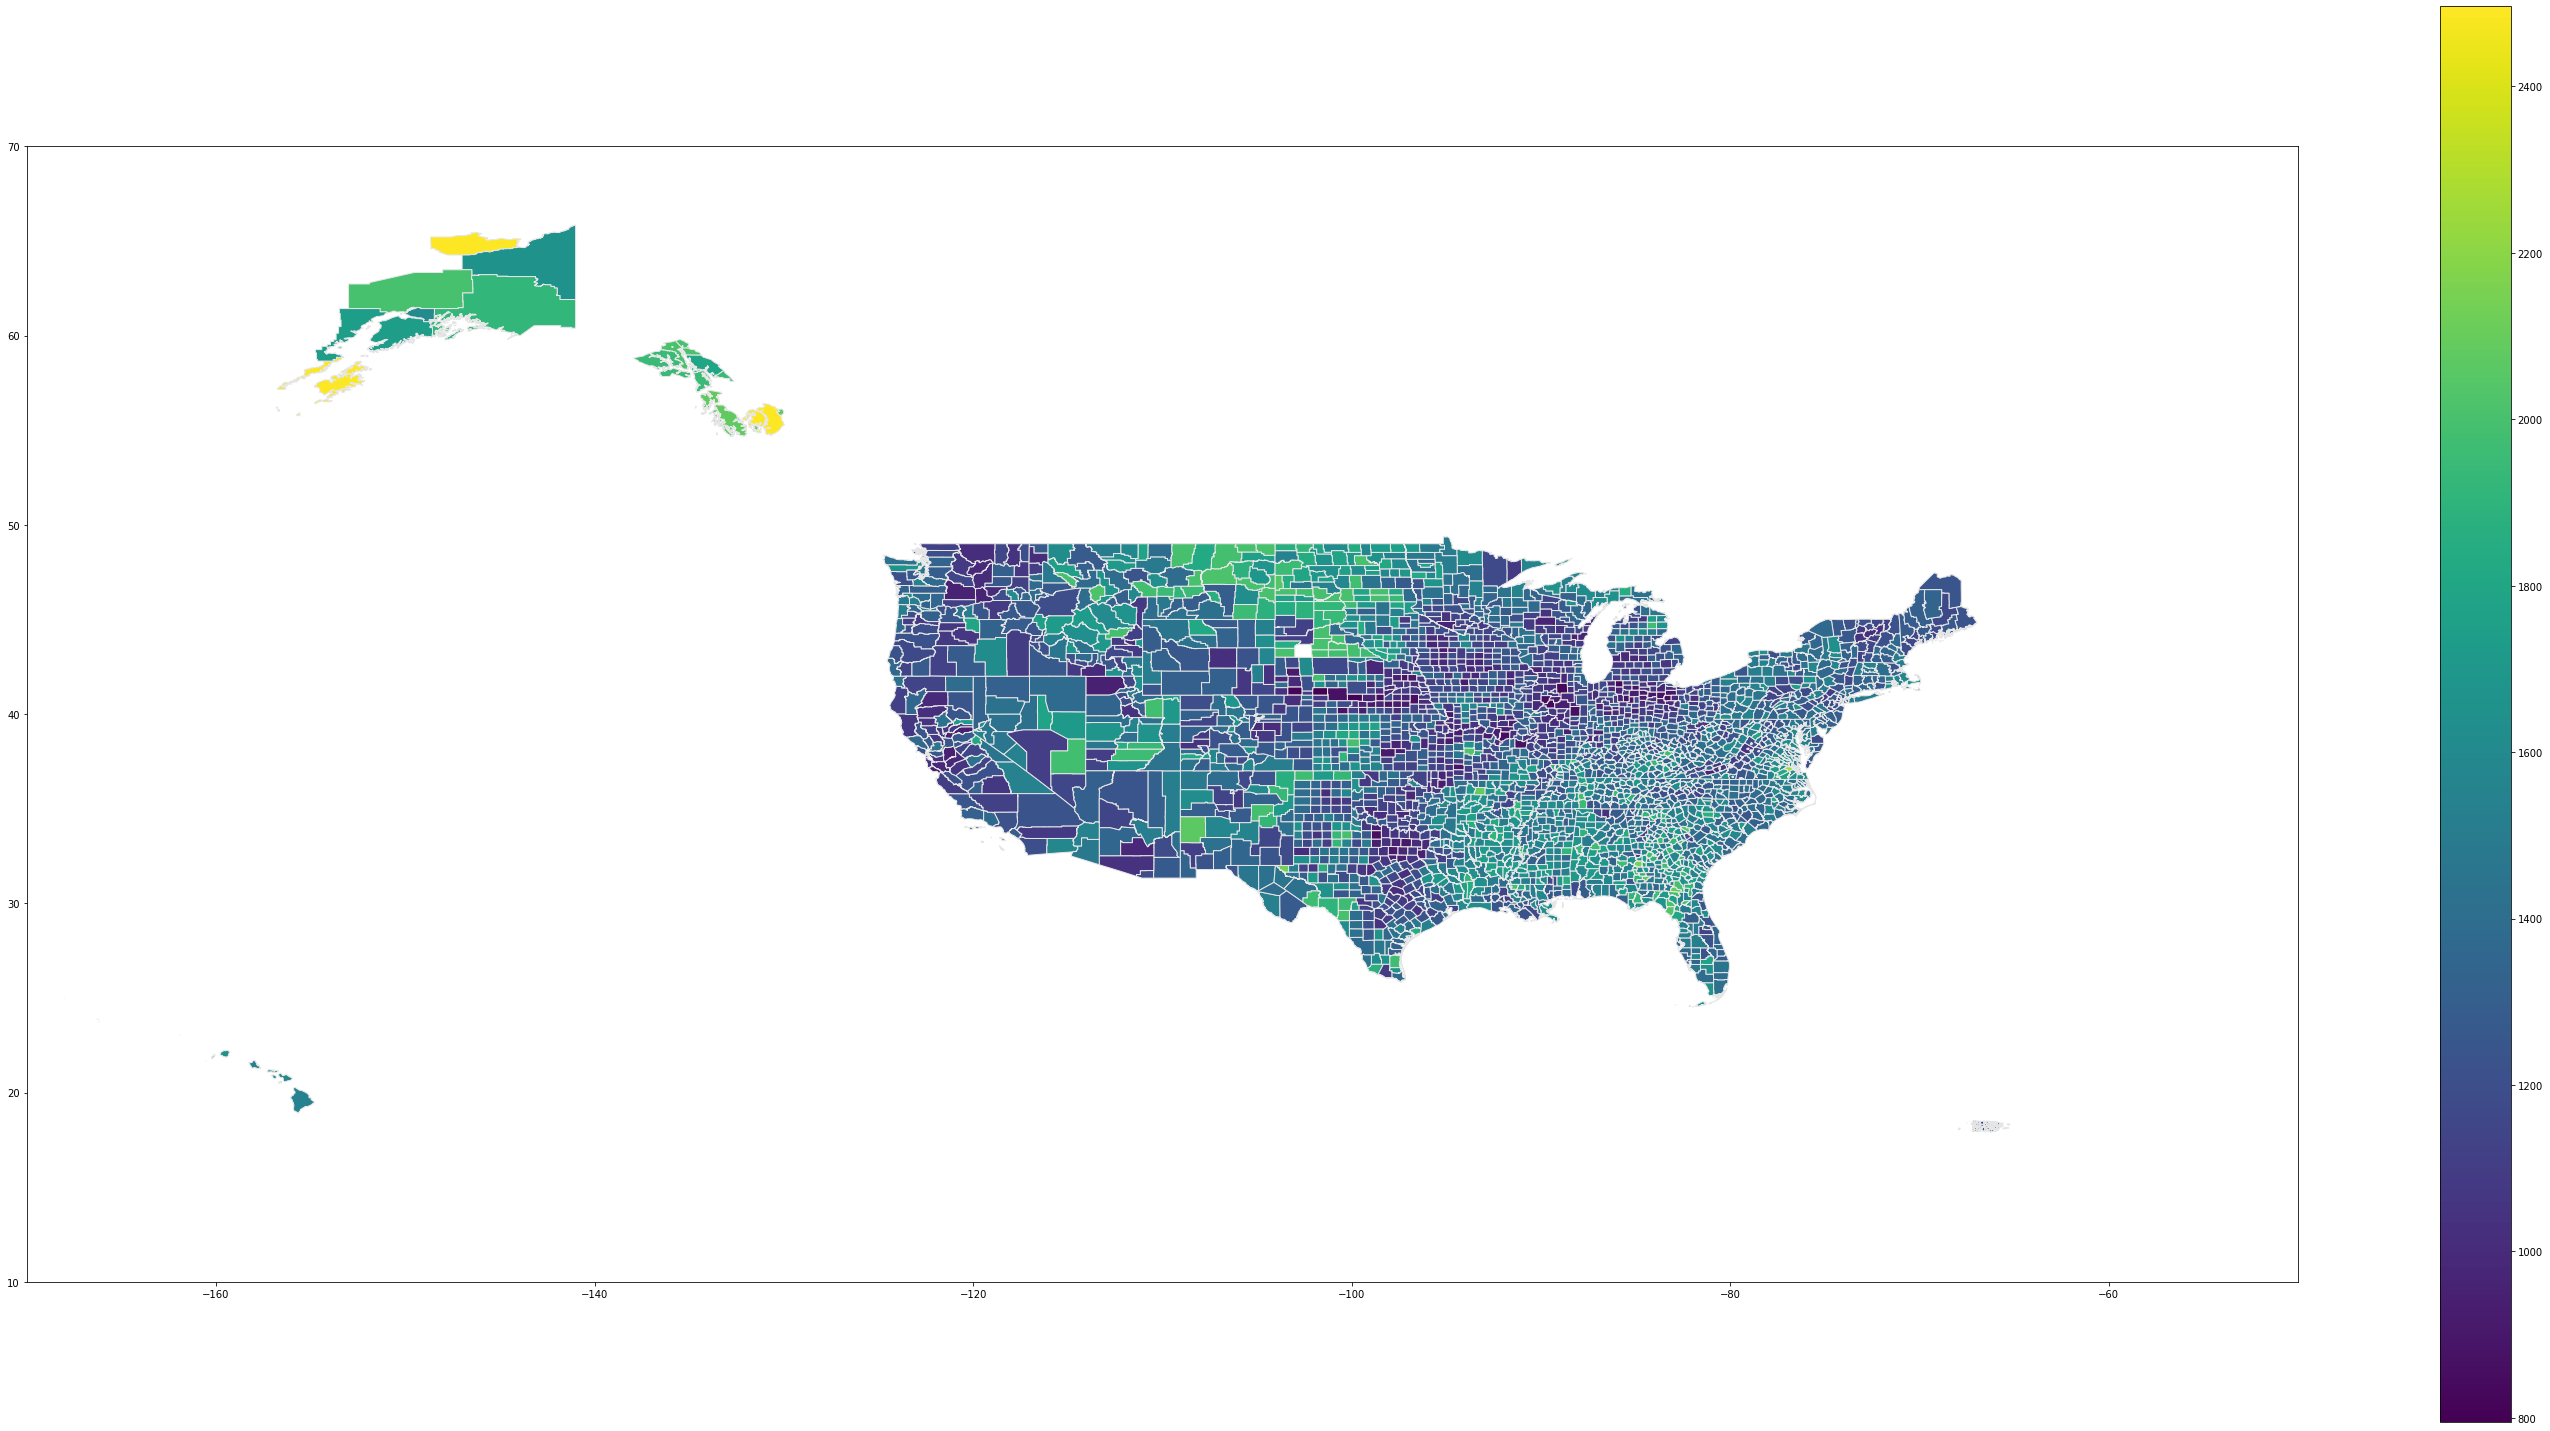

In [8]:
fig2, ax2 = plt.subplots(1, figsize = (40, 20))
plt.xlim([-170, -50])
plt.ylim([10, 70])
fig = df_merged.plot(column='HHI', linewidth=1, ax=ax2, edgecolor='0.9', legend = True)
plt.tight_layout()
#fig.get_figure()